In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#exploration of dataset

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
dataset.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
dataset['Amount'] = sc.fit_transform(pd.DataFrame(dataset['Amount']))

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [ ]:
dataset.drop(['Time'],axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [ ]:
dataset.duplicated().any()

True

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#Plot the Graph

<Axes: ylabel='Frequency'>

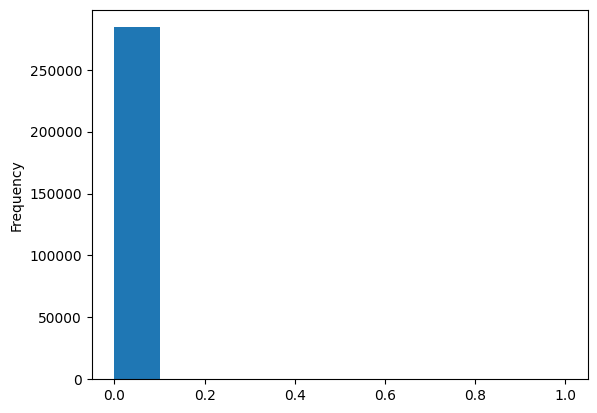

In [ ]:
dataset['Class'].plot.hist()

<Axes: xlabel='Class', ylabel='count'>

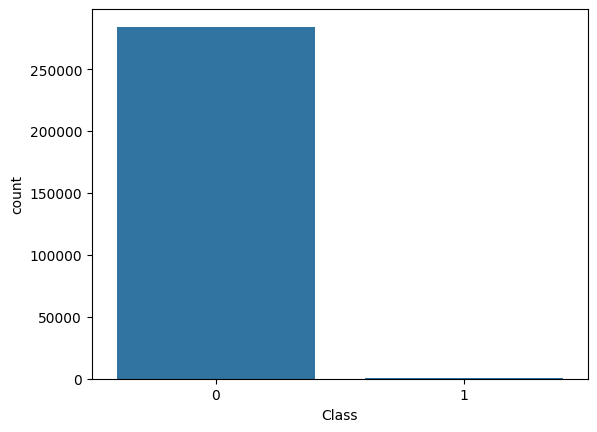

In [ ]:
sns.countplot( x ='Class',data=dataset)

In [ ]:
#Model Training


In [ ]:
X = dataset.drop('Class', axis=1)
Y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,  random_state= 42)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
classifier = {
    '----Random Forest----' : RandomForestClassifier(),
    '----Decision Tree----' : DecisionTreeClassifier(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test,Y_pred))
    print( 'F1-Score:', f1_score(Y_test,Y_pred))
    print( 'Precision:', precision_score(Y_test,Y_pred))
    print( 'Recall:', recall_score(Y_test,Y_pred))
    print('='*30)

----Random Forest----
Accuracy: 0.9995786664794073
Confusion Matrix:
 [[56862     2]
 [   22    76]]
F1-Score: 0.8636363636363635
Precision: 0.9743589743589743
Recall: 0.7755102040816326
----Decision Tree----
Accuracy: 0.9990871107053826
Confusion Matrix:
 [[56833    31]
 [   21    77]]
F1-Score: 0.7475728155339806
Precision: 0.7129629629629629
Recall: 0.7857142857142857


In [ ]:
classifier = {
    'Random Forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('confusion matrix:', confusion_matrix(Y_test,Y_pred))
    print( 'classification Report:', classification_report(Y_test,Y_pred))
    print( 'F1Score:', f1_score(Y_test,Y_pred))
    print( 'Presion :', precision_score(Y_test,Y_pred))
    print( 'Recall : ', recall_score(Y_test,Y_pred))

Random Forest
Accuracy: 0.9995962220427653
confusion matrix: [[56862     2]
 [   21    77]]
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1Score: 0.8700564971751412
Presion : 0.9746835443037974
Recall :  0.7857142857142857
Decision Tree
Accuracy: 0.9991222218320986
confusion matrix: [[56830    34]
 [   16    82]]
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962

F1Score: 0.7663551401869159
Pr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9988764439450862
confusion matrix: [[56839    25]
 [   39    59]]
classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.60      0.65        98

    accuracy                           1.00     56962
   macro avg       0.85      0.80      0.82     56962
weighted avg       1.00      1.00      1.00     56962

F1Score: 0.6483516483516483
Presion : 0.7023809523809523
Recall :  0.6020408163265306


Under **Sampling**


In [ ]:
normal = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]

In [ ]:
normal.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
normal_sample= normal.sample(n=492)

In [ ]:
normal_sample.shape

(492, 31)

In [ ]:
new_data = pd.concat([normal_sample,fraud], ignore_index = True)

In [ ]:
new_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,143407.0,-2.570425,-0.227448,0.834680,1.139338,0.166089,0.997974,0.307606,0.743391,0.218405,...,-0.643933,-1.370873,0.806059,0.087238,0.619352,-0.795076,-0.187801,0.428058,0.151489,0
1,77258.0,1.408349,-0.539465,0.202823,-0.664186,-0.925197,-0.723826,-0.508070,-0.202076,-0.743114,...,-0.276520,-0.296437,-0.086161,-0.064450,0.372104,1.190209,-0.055811,0.003536,-0.281464,0
2,41984.0,0.801798,-0.386188,0.668860,1.252723,-0.674806,-0.030171,-0.131538,0.203593,0.025712,...,-0.019526,-0.489765,0.034173,0.145801,0.060479,-0.619874,0.010446,0.047836,0.295580,0
3,156037.0,-3.692348,3.008841,-1.121494,-0.778320,-2.538427,-0.310044,-1.727557,2.826003,0.127023,...,0.331769,0.810095,0.039426,0.004503,0.254282,0.659284,0.186391,0.067857,-0.087796,0
4,76591.0,-0.519064,0.762920,-0.350312,-1.092770,2.614368,3.216749,0.076134,0.899823,-0.426458,...,-0.307788,-0.998828,0.060048,0.932973,0.008337,0.079361,0.122726,0.084257,-0.335278,0


In [ ]:
new_data.value_counts('Class')

,count
Class,
0,492
1,492


In [ ]:
X = new_data.drop('Class', axis=1)
Y = new_data['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [ ]:
classifier = {
    '----Random Forest----' : RandomForestClassifier(),
    '----Decision Tree----' : DecisionTreeClassifier(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test,Y_pred))
    print( 'F1-Score:', f1_score(Y_test,Y_pred))
    print( 'Precision:', precision_score(Y_test,Y_pred))
    print( 'Recall:', recall_score(Y_test,Y_pred))
    print('='*30)

----Random Forest----
Accuracy: 0.9390862944162437
Confusion Matrix:
 [[96  3]
 [ 9 89]]
F1-Score: 0.9368421052631578
Precision: 0.967391304347826
Recall: 0.9081632653061225
----Decision Tree----
Accuracy: 0.8984771573604061
Confusion Matrix:
 [[86 13]
 [ 7 91]]
F1-Score: 0.900990099009901
Precision: 0.875
Recall: 0.9285714285714286


In [ ]:
classifier = {
    '----Random Forest----' : RandomForestClassifier(),
    '----Decision Tree----' : DecisionTreeClassifier(),
    '----Logastic Regression----' : LogisticRegression(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test,Y_pred))
    print( 'F1-Score:', f1_score(Y_test,Y_pred))
    print( 'Precision:', precision_score(Y_test,Y_pred))
    print( 'Recall:', recall_score(Y_test,Y_pred))
    print('='*30)

----Random Forest----
Accuracy: 0.9187817258883249
Confusion Matrix:
 [[94  5]
 [11 87]]
F1-Score: 0.9157894736842105
Precision: 0.9456521739130435
Recall: 0.8877551020408163
----Decision Tree----
Accuracy: 0.9035532994923858
Confusion Matrix:
 [[86 13]
 [ 6 92]]
F1-Score: 0.9064039408866995
Precision: 0.8761904761904762
Recall: 0.9387755102040817
----Logastic Regression----
Accuracy: 0.934010152284264
Confusion Matrix:
 [[94  5]
 [ 8 90]]
F1-Score: 0.9326424870466321
Precision: 0.9473684210526315
Recall: 0.9183673469387755


## **Over Sampling**

In [ ]:
X = dataset.drop('Class', axis=1)
Y = dataset['Class']

In [ ]:
X.shape

(284807, 30)

In [ ]:
Y.shape

(284807,)

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [ ]:
X_resampled.shape


(568630, 30)

In [ ]:
Y_resampled.shape

(568630,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,Y_resampled, test_size=0.2, random_state= 42)

In [ ]:
classifier = {

    '----Logastic Regression----' : LogisticRegression(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test,Y_pred))
    print( 'F1-Score:', f1_score(Y_test,Y_pred))
    print( 'Precision:', precision_score(Y_test,Y_pred))
    print( 'Recall:', recall_score(Y_test,Y_pred))
    print('='*30)

----Logastic Regression----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9755289028014702
Confusion Matrix:
 [[55640  1110]
 [ 1673 55303]]
F1-Score: 0.9754561729973806
Precision: 0.9803236842571748
Recall: 0.9706367593372648


In [ ]:
classifier = {
    '----Decision Tree----' : DecisionTreeClassifier(),
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print( 'Accuracy:', accuracy_score(Y_test,Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test,Y_pred))
    print( 'F1-Score:', f1_score(Y_test,Y_pred))
    print( 'Precision:', precision_score(Y_test,Y_pred))
    print( 'Recall:', recall_score(Y_test,Y_pred))
    print('='*30)

----Decision Tree----
Accuracy: 0.9985931097550252
Confusion Matrix:
 [[56623   127]
 [   33 56943]]
F1-Score: 0.998597057327745
Precision: 0.9977746626949361
Recall: 0.9994208087615838


In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_resampled, Y_resampled)

DecisionTreeClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(dtc, 'fraudmodel.pkl')

['fraudmodel.pkl']

In [ ]:
import joblib

model = joblib.load('fraudmodel.pkl')
print(type(model))


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
